## Task 2:- Build a decision tree classifier to predict whether a customer will purchase a product or service based on their demographic and behavioral data. Use a dataset such as the Bank Marketing dataset from the UCI Machine Learning Repository.

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,classification_report
from sklearn.ensemble  import AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from scipy.stats import chi2_contingency
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")
from scipy import stats

In [7]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [8]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
bank_marketing = fetch_ucirepo(id=222) 
  
# data (as pandas dataframes) 
X = bank_marketing.data.features 
y = bank_marketing.data.targets 
  
# metadata 
print(bank_marketing.metadata) 
  
# variable information 
print(bank_marketing.variables) 

{'uci_id': 222, 'name': 'Bank Marketing', 'repository_url': 'https://archive.ics.uci.edu/dataset/222/bank+marketing', 'data_url': 'https://archive.ics.uci.edu/static/public/222/data.csv', 'abstract': 'The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).', 'area': 'Business', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 45211, 'num_features': 16, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Occupation', 'Marital Status', 'Education Level'], 'target_col': ['y'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2014, 'last_updated': 'Fri Aug 18 2023', 'dataset_doi': '10.24432/C5K306', 'creators': ['S. Moro', 'P. Rita', 'P. Cortez'], 'intro_paper': {'title': 'A data-driven approach to predict the success of bank telemarketing'

In [9]:
df=pd.concat([X,y],axis=1)

In [10]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN,no
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN,no
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN,no
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,NaN,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,NaN,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,NaN,no


### ABOUT THE DATA

In [11]:
df.shape

(45211, 17)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          45211 non-null  int64 
 1   job          44923 non-null  object
 2   marital      45211 non-null  object
 3   education    43354 non-null  object
 4   default      45211 non-null  object
 5   balance      45211 non-null  int64 
 6   housing      45211 non-null  object
 7   loan         45211 non-null  object
 8   contact      32191 non-null  object
 9   day_of_week  45211 non-null  int64 
 10  month        45211 non-null  object
 11  duration     45211 non-null  int64 
 12  campaign     45211 non-null  int64 
 13  pdays        45211 non-null  int64 
 14  previous     45211 non-null  int64 
 15  poutcome     8252 non-null   object
 16  y            45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [13]:
df.describe()

,age,balance,day_of_week,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [14]:
df.isnull().sum()

age                0
job              288
marital            0
education       1857
default            0
balance            0
housing            0
loan               0
contact        13020
day_of_week        0
month              0
duration           0
campaign           0
pdays              0
previous           0
poutcome       36959
y                  0
dtype: int64

#### There are some values which contrain null values

In [15]:
df["job"].fillna(method="ffill",axis=0,inplace=True)

In [16]:
df["education"].fillna(method="ffill",axis=0,inplace=True)

In [17]:
df["contact"].fillna(method="bfill",axis=0,inplace=True)

In [18]:
df.isnull().sum()

age                0
job                0
marital            0
education          0
default            0
balance            0
housing            0
loan               0
contact            0
day_of_week        0
month              0
duration           0
campaign           0
pdays              0
previous           0
poutcome       36959
y                  0
dtype: int64

#### Lets drop  poutcome column because it has many null values.

In [19]:
df.drop("poutcome",axis=1,inplace=True)

In [20]:
df.shape

(45211, 16)

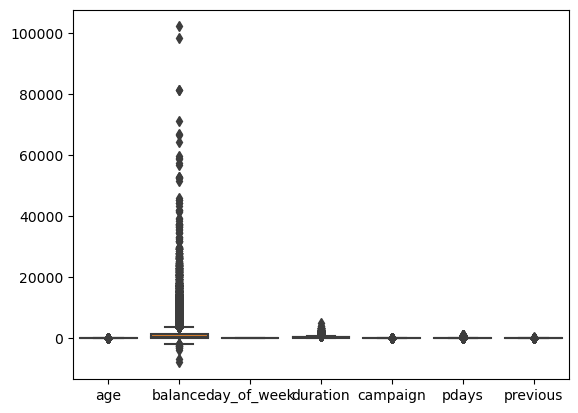

In [21]:
sns.boxplot(df)
plt.show()

#### There are many outliers in the data .

### DATA VISUALIZATION

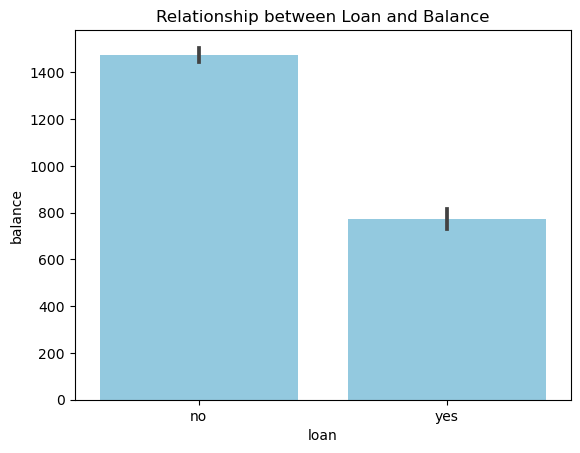

In [22]:
sns.barplot(data=df, x="loan", y="balance", color="skyblue")
plt.title('Relationship between Loan and Balance')
plt.show()

#### In this graph there is no relationship between loan and balance,population of no is greter than yes in tha data

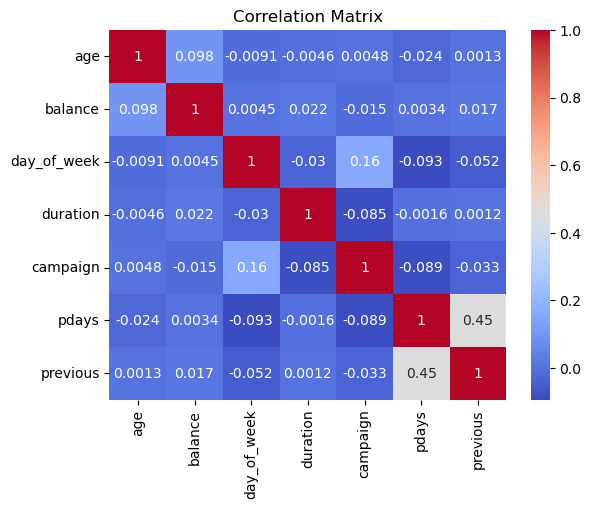

In [23]:
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title('Correlation Matrix')
plt.show()

#### In this heatmap data we can see that :-

#### 1)all the variables in the data have positive relations

#### 2)Both the age and balance have strong relation ship with balance which is near to 1

#### 3)Both pdays and previous have good realtion ship which is 0.45

#### 4)Both balance and day of week have good relation ship which is  0.045



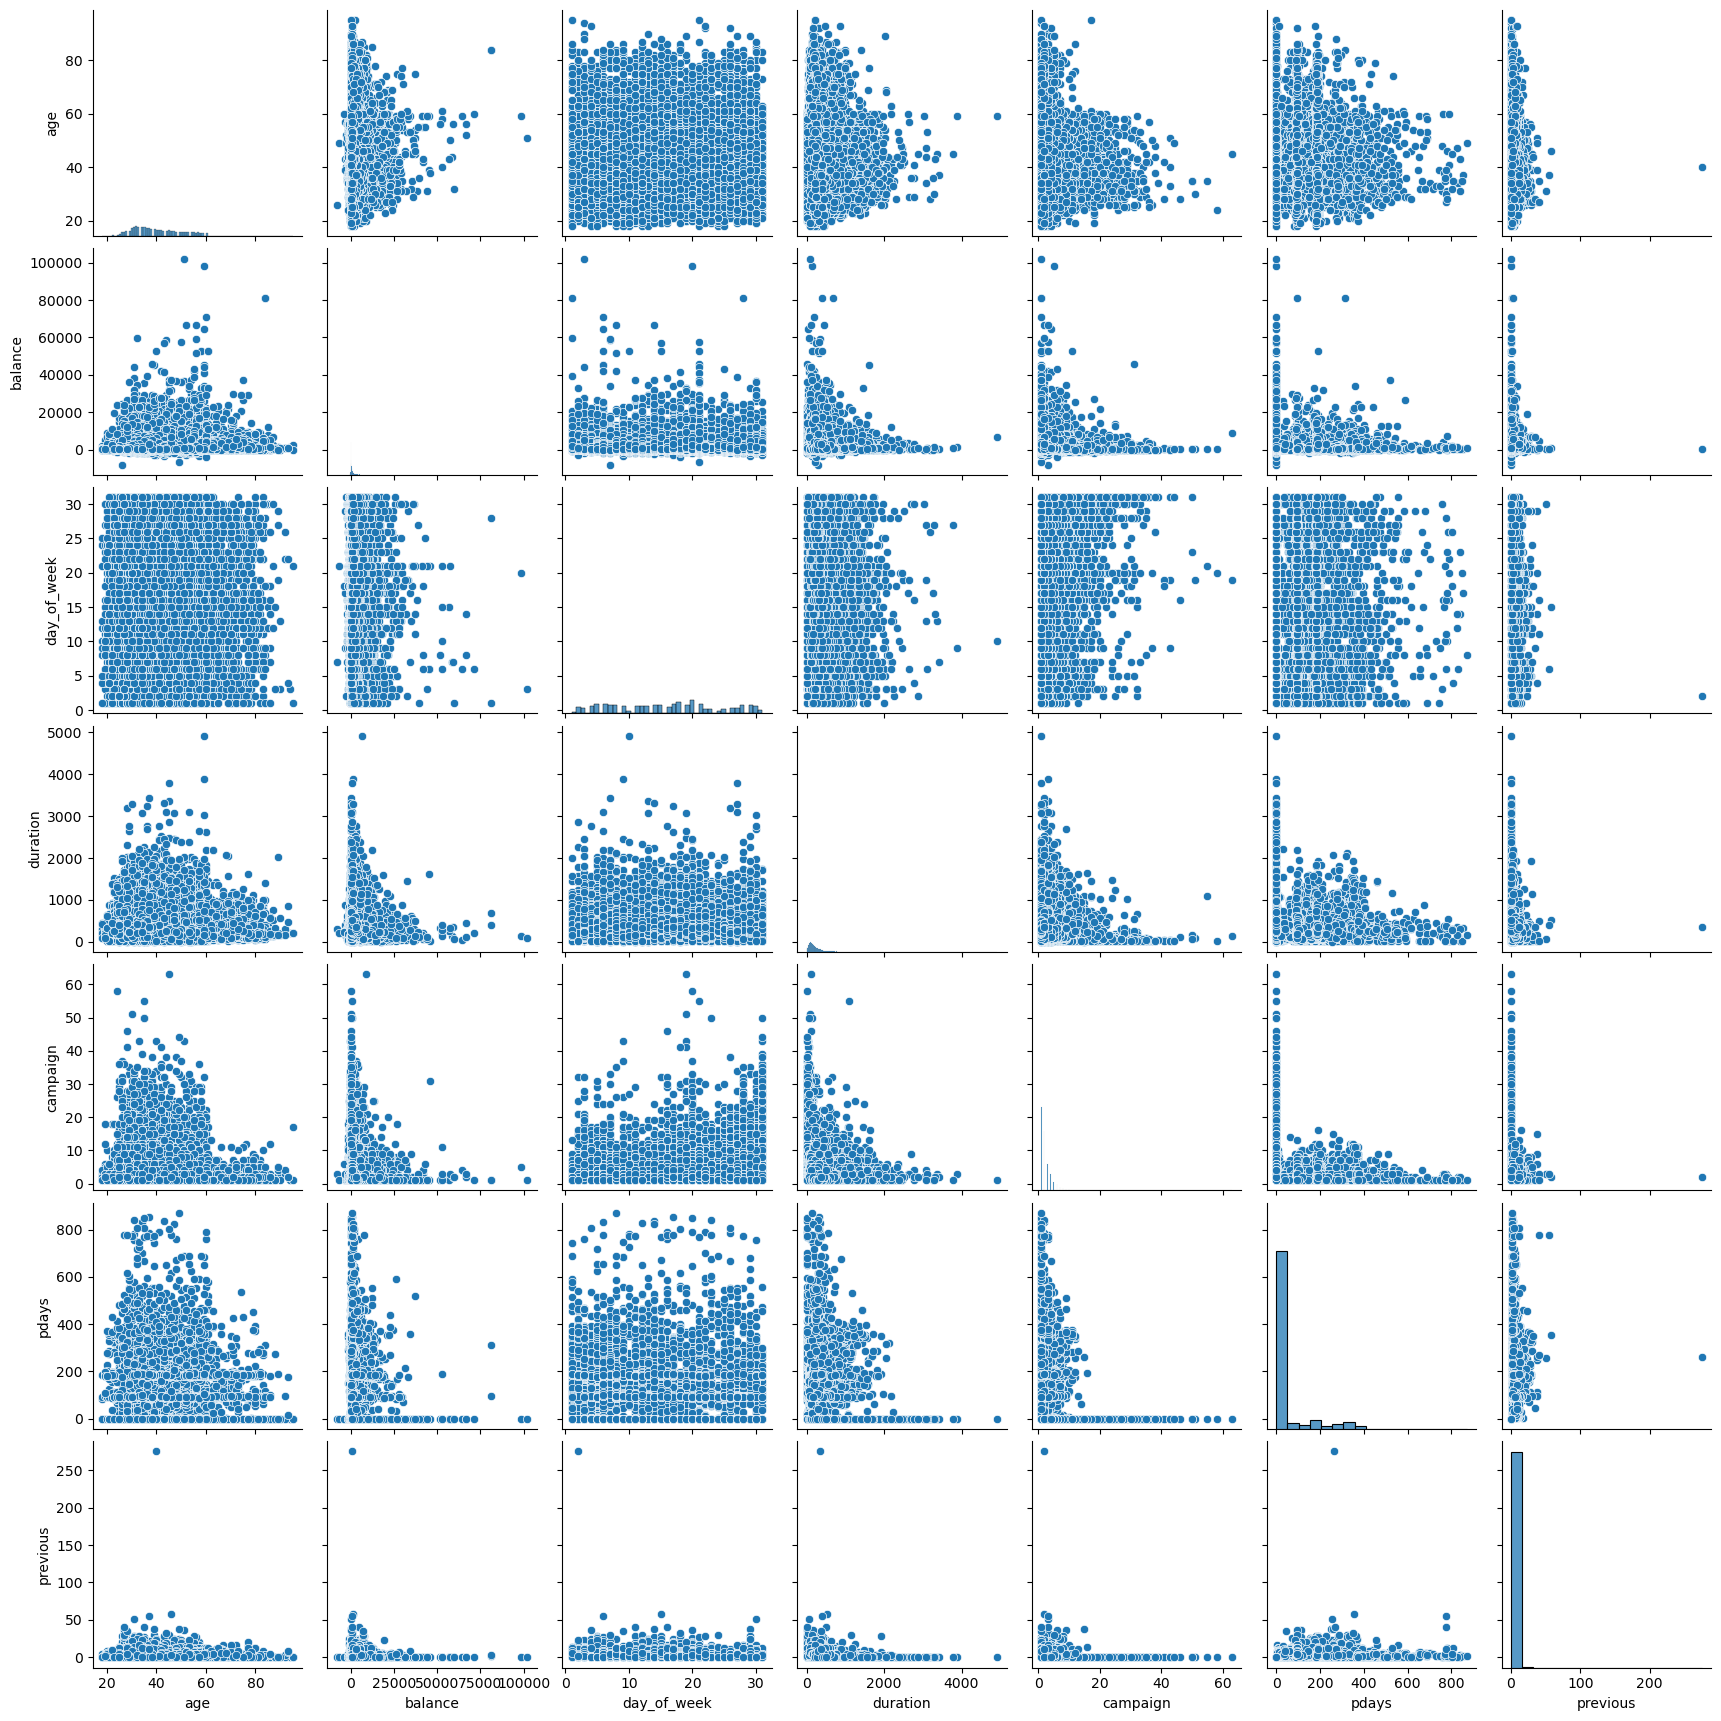

In [24]:
sns.pairplot(df)
plt.show()

### STATISTICAL TESTING

In [25]:
#data normality
df_num=df.select_dtypes(np.number)

In [26]:
shapiro_results = pd.DataFrame(columns=['Column', 'Statistic', 'P-Value', 'Normality'])
alpha=0.05
# Perform Shapiro-Wilk test for normality on each numerical column
for column in df_num:
    stat, pval = stats.shapiro(df_num[column])
    
    # Check if the p-value is less than or equal to alpha
    is_normal = 'Yes' if pval > alpha else 'No'
    
    shapiro_results = shapiro_results.append({
        'Column': column,
        'Statistic': stat,
        'P-Value': pval,
        'Normality': is_normal
    }, ignore_index=True)

# Display the results
print(shapiro_results)

        Column  Statistic  P-Value Normality
0          age   0.960546      0.0        No
1      balance   0.457170      0.0        No
2  day_of_week   0.959460      0.0        No
3     duration   0.726995      0.0        No
4     campaign   0.550732      0.0        No
5        pdays   0.474787      0.0        No
6     previous   0.235591      0.0        No


#### Due to data not being normal ,so we will go for non parametric test

In [27]:
from scipy.stats import chi2_contingency
for i in df.columns:
    contingency_table = pd.crosstab(df[i], df["y"])
    chi2, p_value, _, _ = chi2_contingency(contingency_table)
    alpha = 0.05
    if p_value < alpha:
        
        print("Reject the null hypothesis: There is a significant association between " ,i,"and y")
    else:
        print("Failed to reject the null hypothesis: There may not be a significant association between ",i,"and y")

Reject the null hypothesis: There is a significant association between  age and y
Reject the null hypothesis: There is a significant association between  job and y
Reject the null hypothesis: There is a significant association between  marital and y
Reject the null hypothesis: There is a significant association between  education and y
Reject the null hypothesis: There is a significant association between  default and y
Reject the null hypothesis: There is a significant association between  balance and y
Reject the null hypothesis: There is a significant association between  housing and y
Reject the null hypothesis: There is a significant association between  loan and y
Reject the null hypothesis: There is a significant association between  contact and y
Reject the null hypothesis: There is a significant association between  day_of_week and y
Reject the null hypothesis: There is a significant association between  month and y
Reject the null hypothesis: There is a significant associatio

#### Since all the variables have significat relation ship between them so we go with another model buliding

#### We split the data x as features and y has target

In [28]:
new_df=df.copy()

In [29]:
x=new_df.drop("y",axis=1)

In [30]:
y=new_df["y"]

In [31]:
y.replace({"yes":1,"no":0},inplace=True)

In [32]:
y

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: y, Length: 45211, dtype: int64

#### We will be Enocoding and Scaling the data.

In [33]:
x_encod=pd.get_dummies(x,drop_first=True)
x_encod

,age,balance,day_of_week,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,58,2143,5,261,1,-1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,44,29,5,151,1,-1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,33,2,5,76,1,-1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,47,1506,5,92,1,-1,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,33,1,5,198,1,-1,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,17,977,3,-1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
45207,71,1729,17,456,2,-1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
45208,72,5715,17,1127,5,184,3,0,0,0,...,0,0,0,0,0,0,0,1,0,0
45209,57,668,17,508,4,-1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [34]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Assuming x_encod is a DataFrame
ss = StandardScaler()
x_scaled_array = ss.fit_transform(x_encod)
x_scaled= pd.DataFrame(x_scaled_array, index=x_encod.index, columns=x_encod.columns)

In [35]:
x_scaled

,age,balance,day_of_week,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,1.606965,0.256419,-1.298476,0.011016,-0.569351,-0.411453,-0.251940,-0.525454,-0.185119,-0.168971,...,-0.068963,-0.249477,-0.178958,-0.424206,-0.366006,-0.103262,1.511374,-0.310263,-0.128819,-0.113898
1,0.288529,-0.437895,-1.298476,-0.416127,-0.569351,-0.411453,-0.251940,-0.525454,-0.185119,-0.168971,...,-0.068963,-0.249477,-0.178958,-0.424206,-0.366006,-0.103262,1.511374,-0.310263,-0.128819,-0.113898
2,-0.747384,-0.446762,-1.298476,-0.707361,-0.569351,-0.411453,-0.251940,-0.525454,5.401936,-0.168971,...,-0.068963,-0.249477,-0.178958,-0.424206,-0.366006,-0.103262,1.511374,-0.310263,-0.128819,-0.113898
3,0.571051,0.047205,-1.298476,-0.645231,-0.569351,-0.411453,-0.251940,1.903118,-0.185119,-0.168971,...,-0.068963,-0.249477,-0.178958,-0.424206,-0.366006,-0.103262,1.511374,-0.310263,-0.128819,-0.113898
4,-0.747384,-0.447091,-1.298476,-0.233620,-0.569351,-0.411453,-0.251940,1.903118,-0.185119,-0.168971,...,-0.068963,-0.249477,-0.178958,-0.424206,-0.366006,-0.103262,1.511374,-0.310263,-0.128819,-0.113898
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,0.947747,-0.176460,0.143418,2.791329,0.076230,-0.411453,-0.251940,-0.525454,-0.185119,-0.168971,...,-0.068963,-0.249477,-0.178958,-0.424206,-0.366006,-0.103262,-0.661650,3.223067,-0.128819,-0.113898
45207,2.831227,0.120447,0.143418,0.768224,-0.246560,-0.411453,-0.251940,-0.525454,-0.185119,-0.168971,...,-0.068963,-0.249477,-0.178958,-0.424206,-0.366006,-0.103262,-0.661650,3.223067,-0.128819,-0.113898
45208,2.925401,1.429593,0.143418,3.373797,0.721811,1.436189,1.050473,-0.525454,-0.185119,-0.168971,...,-0.068963,-0.249477,-0.178958,-0.424206,-0.366006,-0.103262,-0.661650,3.223067,-0.128819,-0.113898
45209,1.512791,-0.228024,0.143418,0.970146,0.399020,-0.411453,-0.251940,1.903118,-0.185119,-0.168971,...,-0.068963,-0.249477,-0.178958,-0.424206,-0.366006,-0.103262,-0.661650,3.223067,-0.128819,-0.113898


### TRAIN TEST 

In [36]:
xtrain,xtest,ytrain,ytest=train_test_split(x_scaled,y,random_state=0,test_size=0.3)

In [37]:
print('X_Train shape is:',xtrain.shape)
print('X_Test shape is:',xtest.shape)
print('Y_Train shape is:',ytrain.shape)
print('Y_Test shape is:',ytest.shape)

X_Train shape is: (31647, 36)
X_Test shape is: (13564, 36)
Y_Train shape is: (31647,)
Y_Test shape is: (13564,)


### MODEL BULIDING

In [38]:
#LOGISTIC MODEL
lr=LogisticRegression()
lrmodel=lr.fit(xtrain,ytrain)

In [39]:
lr_pred=lrmodel.predict(xtest)

In [40]:
print(classification_report(ytest,lr_pred))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94     11969
           1       0.59      0.27      0.37      1595

    accuracy                           0.89     13564
   macro avg       0.75      0.62      0.66     13564
weighted avg       0.87      0.89      0.87     13564



In [41]:
#KNN Model
from sklearn.neighbors import KNeighborsClassifier

In [42]:
kn=KNeighborsClassifier()
kn_model=kn.fit(xtrain,ytrain)

In [43]:
y_pred_kn=kn_model.predict(xtest)

In [44]:
ytrain.shape

(31647,)

In [45]:
y_pred_kn.shape

(13564,)

In [46]:
print(classification_report(ytest,y_pred_kn))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94     11969
           1       0.53      0.26      0.35      1595

    accuracy                           0.89     13564
   macro avg       0.72      0.62      0.64     13564
weighted avg       0.86      0.89      0.87     13564



In [47]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier

In [48]:
dt=DecisionTreeClassifier()
dt_model=dt.fit(xtrain,ytrain)

In [49]:
dt_predict=dt_model.predict(xtest)

In [50]:
print(classification_report(ytest,dt_predict))


              precision    recall  f1-score   support

           0       0.93      0.92      0.92     11969
           1       0.44      0.45      0.44      1595

    accuracy                           0.87     13564
   macro avg       0.68      0.69      0.68     13564
weighted avg       0.87      0.87      0.87     13564



In [51]:
#Random Tree
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)


In [52]:
# Train the model
rf_model.fit(xtrain,ytrain)

# Make predictions on the test set
y_pred_rf = rf_model.predict(xtest)

# Evaluate the accuracy of the model
print(classification_report(ytest,y_pred_rf))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94     11969
           1       0.61      0.39      0.47      1595

    accuracy                           0.90     13564
   macro avg       0.77      0.68      0.71     13564
weighted avg       0.89      0.90      0.89     13564



### Interpretation:
#### The model performs well in predicting the majority class (0) with high precision and recall. However, it struggles with the minority class (1), showing a trade-off between precision and recall. The F1-scores provide a balanced assessment, emphasizing the need for improvement, especially in correctly identifying positive instances. The weighted average considers the class imbalance and provides an overall evaluation of the model's performance.